# Predicting prices of Used Cars using Statistical Models (CRISP-DM)

# Initial Data Description
The file ToyotaCorolla.csv contains data on used cars(ToyotaCorolla) on sale during late summer of 2004 in the Netherlands.It has 1436 records containing details on 38 attributes.The goal is to predict the price of a used Toyota Corolla based on its specification.

#  Data Source
https://www.dataminingbook.com/content/datasets-download-r-and-python-editions

# Dataset Information
The data description for all the features used are described below:
1) ID:The ID number created while preparing the data
2) Model: Particular Toyota model or variant of the same model
3) Price: price of the manufactured car
4) Age_08_04: age of the car as per August 2004
5) Mfg_Month: Month of Manufacturing
6) Mfg_Year: Year of Manufacturing
7) KM: Number of kilometers the car has been driven
8) Fuel_type: Whether the car is of Petrol or Diesel type
9) HP: Horsepower is the metric used to indicate the power produced by a car's engine 
10) Color: colors offered by the Manufacturer
11) Met_color: whether the car appears to be that of a polished metal
12) Automatic: automatic car is an automobile with an automatic transmission that doesn't require a driver to shift gears manually
13) CC: refers to cubic centimetres, or the metric measurement of engine capacity
14) Doors: Number of doors in the car
15) Cylinders: Number of cylinders in the car (A cylinder is a vital part of the engine. It's a chamber where fuel is combusted and power is generated)
16) Gears: Number of gears in the car (As you accelerate, the drive gear will apply power to the wheels and progressively shift into higher 'gears' as the engine RPM reaches the desired level)
17) Quaterly_Tax: Tax expenses for quaterly basis (euro)
18) Weight: weight of the car (kg)
19) Mfr_Guarantee: if the car has guarantee or not
20) BOVAG_Guarantee: happens to be a kind of guarantee
21) Guarantee_Period: years of guarantee
22) ABS: ABS or an Anti-Lock Braking System is a piece of safety equipment that prevents the wheels of a vehicle from locking up under emergency
23) Airbag_1: airbags in the front
24) Airbag_2: airbags available in the backend
25) Airco: if the car has aircondition feature
26) Automatic_airco: if the car has automatic aircondition facility
27) BoardComputer: board computer continuously informs the driver by specific displays on the instrument panel about the current or average fuel consumption
28) CD_player: if the car supports CD player option
29) Central_lock: allow the driver or front passenger to simultaneously lock or unlock all the doors of an automobile
30) Powered_windows: The windows on cars which can be opened or shut with the help of buttons
31) Power_Steering: power-assisted steering is a system for steering that uses power from the engine so that it is easier for the driver to steer the vehicle
32) Radio: it is the brains and command center for a car's audio system
33) Mistlamps: Fog lights are designed to be used at low speed in fog, heavy mist, snow and other poor-visibility situations
34) Sport_Model: A sports car is a car designed with an emphasis on dynamic performance, such as handling, acceleration, top speed, or thrill of driving
35) Backseat_Divider: a removable seat designed to hold a small child safely while riding in an automobile
36) Metallic_Rim: The rim is the "outer edge of a wheel, holding the tire"
37) Radio_cassette: an analog magnetic tape recording format for audio recording and playback
38) Parking_Assistant: Park Assist is an automated parking aid that helps drivers park with greater precision
39) Tow_Bar: a metal bar on the back of a vehicle that is used for towing something


# Business Problem
Predicting the price of a car is an important and interesting problem at this juncture and this is also relevant for a developing country like India. In many developed countries, it is common to lease a car rather than buying it outright. A lease is a binding contract between a buyer and a seller(or a third party –usually a bank, insurance firm or other financial institutions) in which the buyer mustpay fixed instalments for a predefined number of months/years to the seller/financer.After the lease period is over, the buyer has the possibility to buy the car at its residualvalue, i.e. its expected resale value. Thus, it is of commercial interest to seller/financers to be able to predict the salvage value (residual value) of cars with accuracy.Now two things can occurr from the business perspective of used cars:

1) If the residual value is under-estimated by the seller/financer at the beginning, the instalments will be higher for the clients who will certainly then opt foranother seller/financer.
2)  If the residual value is over-estimated, the instalments will belower for the clients but then the seller/financer may have much difficulty at selling these high-priced used cars at this over-estimated residual value.

Thus, we can see that estimating the price of used cars is of very high commercial importance as well.Manufacturers’ from Germany made a loss of 1 billion Euros in their USA marketbecause of mis-calculating the residual value of leased cars. 

# Project Objective
To predict the price of used car using Regresion Algorithms (Multiple Linear Regression,Ridge Regression,LASSO) 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
car_df=pd.read_csv('C:\data\ToyotaCorolla.csv')
car_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [2]:
print(car_df.shape)
car_df.columns

(1436, 39)


Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [3]:
car_df.drop(['Id'],axis=1,inplace=True)     # Id column is of no importance
print(car_df.shape)

(1436, 38)


# output the summary

In [4]:
car_df.dtypes

Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim          int64
Radio_cassette      

In [5]:
car_df.nunique()

Model                 319
Price                 236
Age_08_04              77
Mfg_Month              12
Mfg_Year                7
KM                   1263
Fuel_Type               3
HP                     12
Met_Color               2
Color                  10
Automatic               2
CC                     13
Doors                   4
Cylinders               1
Gears                   4
Quarterly_Tax          13
Weight                 59
Mfr_Guarantee           2
BOVAG_Guarantee         2
Guarantee_Period        9
ABS                     2
Airbag_1                2
Airbag_2                2
Airco                   2
Automatic_airco         2
Boardcomputer           2
CD_Player               2
Central_Lock            2
Powered_Windows         2
Power_Steering          2
Radio                   2
Mistlamps               2
Sport_Model             2
Backseat_Divider        2
Metallic_Rim            2
Radio_cassette          2
Parking_Assistant       2
Tow_Bar                 2
dtype: int64

In [6]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
Mfg_Month,1436.0,5.548747,3.354085,1.0,3.0,5.0,8.00,12.0
Mfg_Year,1436.0,1999.625348,1.540722,1998.0,1998.0,1999.0,2001.00,2004.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
Met_Color,1436.0,0.674791,0.468616,0.0,0.0,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
CC,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0


In [7]:
car_df.drop('Model',axis=1,inplace=True) #dropping make here but in real project,may separate data based on make
# the different make in same dataset may not be a good idea
car_df.shape

(1436, 37)

# cleaning the data 

In [8]:
features=list(car_df.columns)

In [9]:
model_data = car_df[features]

In [10]:
model_data.isnull().sum()

Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

In [11]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Price              1436 non-null   int64 
 1   Age_08_04          1436 non-null   int64 
 2   Mfg_Month          1436 non-null   int64 
 3   Mfg_Year           1436 non-null   int64 
 4   KM                 1436 non-null   int64 
 5   Fuel_Type          1436 non-null   object
 6   HP                 1436 non-null   int64 
 7   Met_Color          1436 non-null   int64 
 8   Color              1436 non-null   object
 9   Automatic          1436 non-null   int64 
 10  CC                 1436 non-null   int64 
 11  Doors              1436 non-null   int64 
 12  Cylinders          1436 non-null   int64 
 13  Gears              1436 non-null   int64 
 14  Quarterly_Tax      1436 non-null   int64 
 15  Weight             1436 non-null   int64 
 16  Mfr_Guarantee      1436 non-null   int64 


In [12]:
clean_df = pd.DataFrame(model_data)

In [13]:
result4=clean_df['Guarantee_Period'].value_counts()
print(result4)

3     1274
6       77
12      73
36       4
24       4
28       1
20       1
18       1
13       1
Name: Guarantee_Period, dtype: int64


In [14]:
# let us count data values for some columns
result3=clean_df['Met_Color'].value_counts()
print(result3)
total = clean_df["Met_Color"].count()
yes = result3.values[1]
Met_Color_pct = (yes/total)*100
print(round(Met_Color_pct,2),"%")

1    969
0    467
Name: Met_Color, dtype: int64
32.52 %


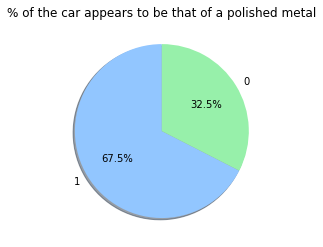

In [15]:
plt.style.use("seaborn-pastel")
plt.pie(result3.values, labels = result3.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of the car appears to be that of a polished metal")
plt.show()

In [16]:
result15=clean_df['Automatic'].value_counts()
print(result15)
total = clean_df["Automatic"].count()
yes = result15.values[1]
Automatic_pct = (yes/total)*100
print(round(Automatic_pct,2),"%")

0    1356
1      80
Name: Automatic, dtype: int64
5.57 %


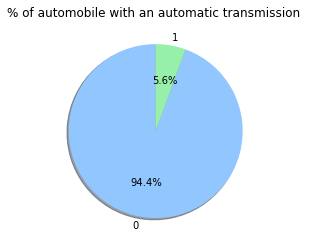

In [17]:
plt.pie(result15.values, labels = result15.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of automobile with an automatic transmission ")
plt.show()

In [18]:
clean_df['Cylinders'].value_counts()  # need to drop this column i.e. an attribute which is only one type of data is not a good dimension

4    1436
Name: Cylinders, dtype: int64

In [19]:
result14=clean_df['Gears'].value_counts()  
print(result14)

5    1390
6      43
3       2
4       1
Name: Gears, dtype: int64


In [20]:
result13=clean_df['ABS'].value_counts() 
print(result13)
total = clean_df["ABS"].count()
yes = result13.values[1]
ABS_pct = (yes/total)*100
print(round(ABS_pct,2),"%")

1    1168
0     268
Name: ABS, dtype: int64
18.66 %


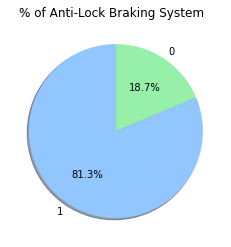

In [21]:
plt.pie(result13.values, labels = result13.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of Anti-Lock Braking System  ")
plt.show()

In [22]:
result12=clean_df['Airbag_1'].value_counts()    
print(result12)
total = clean_df["Airbag_1"].count()
yes = result12.values[1]
Airbag_1_pct = (yes/total)*100
print(round(Airbag_1_pct,2),"%")

1    1394
0      42
Name: Airbag_1, dtype: int64
2.92 %


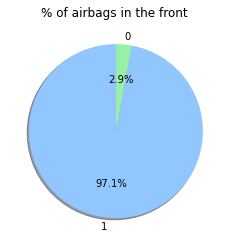

In [23]:
plt.pie(result12.values, labels = result12.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of airbags in the front ")
plt.show()

In [24]:
result11=clean_df['Airbag_2'].value_counts()
print(result11)
total = clean_df["Airbag_2"].count()
yes = result11.values[1]
Airbag_2_pct = (yes/total)*100
print(round(Airbag_2_pct,2),"%")

1    1038
0     398
Name: Airbag_2, dtype: int64
27.72 %


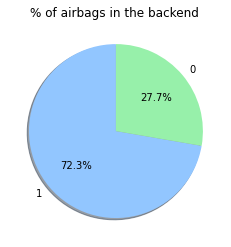

In [25]:
plt.pie(result11.values, labels = result11.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of airbags in the backend ")
plt.show()

In [26]:
result10=clean_df['CD_Player'].value_counts()
print(result10)
total = clean_df["CD_Player"].count()
yes = result10.values[1]
CD_Player_pct = (yes/total)*100
print(round(CD_Player_pct,2),"%")

0    1122
1     314
Name: CD_Player, dtype: int64
21.87 %


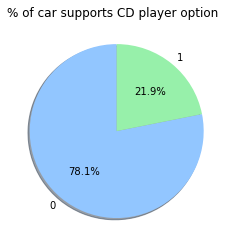

In [27]:
plt.pie(result10.values, labels = result10.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of car supports CD player option  ")
plt.show()

In [28]:
clean_df['Power_Steering'].value_counts()        

1    1404
0      32
Name: Power_Steering, dtype: int64

In [29]:
result9=clean_df['Radio'].value_counts()
print(result9)
total = clean_df["Radio"].count()
yes = result9.values[1]
Radio_pct = (yes/total)*100
print(round(Radio_pct,2),"%")

0    1226
1     210
Name: Radio, dtype: int64
14.62 %


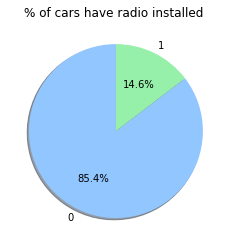

In [30]:
plt.pie(result9.values, labels = result9.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of cars have radio installed ")
plt.show()

In [31]:
result8=clean_df['Mistlamps'].value_counts()
print(result8)
total = clean_df["Mistlamps"].count()
yes = result8.values[1]
Mistlamps_pct = (yes/total)*100
print(round(Mistlamps_pct,2),"%")

0    1067
1     369
Name: Mistlamps, dtype: int64
25.7 %


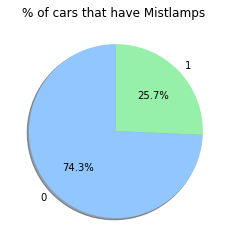

In [32]:
plt.pie(result8.values, labels = result8.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of cars that have Mistlamps ")
plt.show()

In [33]:
result7=clean_df['Sport_Model'].value_counts()
print(result7)
total = clean_df["Sport_Model"].count()
yes = result7.values[1]
Sport_Model_pct = (yes/total)*100
print(round(Sport_Model_pct,2),"%")

0    1005
1     431
Name: Sport_Model, dtype: int64
30.01 %


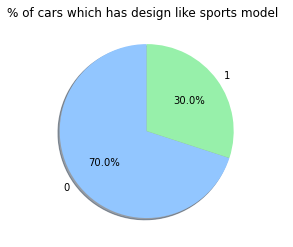

In [34]:
plt.pie(result7.values, labels = result7.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of cars which has design like sports model  ")
plt.show()

In [35]:
result6=clean_df['Backseat_Divider'].value_counts()
print(result6)
total = clean_df["Backseat_Divider"].count()
yes = result6.values[1]
Backseat_Divider_pct = (yes/total)*100
print(round(Backseat_Divider_pct,2),"%")

1    1106
0     330
Name: Backseat_Divider, dtype: int64
22.98 %


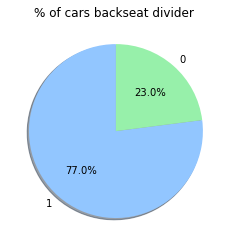

In [36]:
plt.pie(result6.values, labels = result6.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of cars backseat divider ")
plt.show()

In [37]:
result5=clean_df['Metallic_Rim'].value_counts()
print(result5)
total = clean_df["Metallic_Rim"].count()
yes = result5.values[1]
Metallic_Rim_pct = (yes/total)*100
print(round(Metallic_Rim_pct,2),"%")

0    1142
1     294
Name: Metallic_Rim, dtype: int64
20.47 %


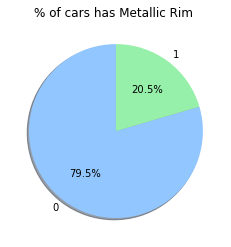

In [38]:
plt.pie(result5.values, labels = result5.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of cars has Metallic Rim ")
plt.show()

In [39]:
result2=clean_df['Radio_cassette'].value_counts()  
print(result2)
total = clean_df["Radio_cassette"].count()
yes = result2.values[1]
Radio_cassette_pct = (yes/total)*100
print(round(Radio_cassette_pct,2),"%")

0    1227
1     209
Name: Radio_cassette, dtype: int64
14.55 %


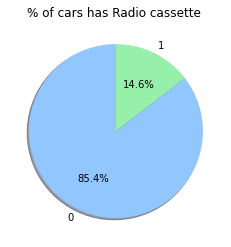

In [40]:
plt.pie(result2.values, labels = result2.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of cars has Radio cassette ")
plt.show()

In [41]:
clean_df['Parking_Assistant'].value_counts()      # drop it as the model will always try to replicate for no parking_Assistant

0    1432
1       4
Name: Parking_Assistant, dtype: int64

In [42]:
result1=clean_df['Tow_Bar'].value_counts()
print(result1)
total = clean_df["Tow_Bar"].count()
yes = result1.values[1]
Tow_Bar_pct = (yes/total)*100
print(round(Tow_Bar_pct,2),"%")

0    1037
1     399
Name: Tow_Bar, dtype: int64
27.79 %


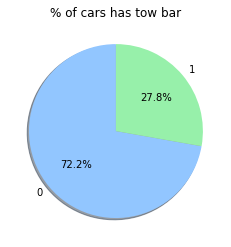

In [43]:
plt.pie(result1.values, labels = result1.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of cars has tow bar")
plt.show()

In [44]:
result=clean_df['Color'].value_counts()
result

Grey      301
Blue      283
Red       278
Green     220
Black     191
Silver    122
White      31
Violet      4
Yellow      3
Beige       3
Name: Color, dtype: int64

In [45]:
result1=clean_df['Fuel_Type'].value_counts()
print(result1)
total = clean_df["Fuel_Type"].count()
yes = result1.values[1]
Fuel_Type_pct = (yes/total)*100
print(round(Fuel_Type_pct,2),"%")

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64
10.79 %


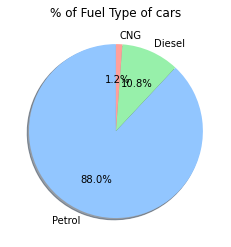

In [46]:
plt.pie(result1.values, labels = result1.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of Fuel Type of cars")
plt.show()

In [47]:
result20=clean_df['Power_Steering'].value_counts()
print(result20)
total = clean_df["Power_Steering"].count()
yes = result20.values[1]
Power_Steering_pct = (yes/total)*100
print(round(Power_Steering_pct,2),"%")

1    1404
0      32
Name: Power_Steering, dtype: int64
2.23 %


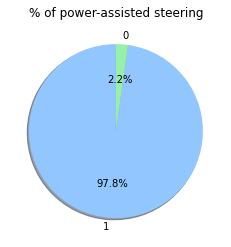

In [48]:
plt.pie(result20.values, labels = result20.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of power-assisted steering")
plt.show()

In [49]:
clean_df.shape

(1436, 37)

# Drop the variables which has 99% the same category from the raw data as it would create biased model

In [50]:
clean_df.drop(['Parking_Assistant','Cylinders'],axis=1,inplace=True)
clean_df.shape

(1436, 35)

In [51]:
clean_df=clean_df.replace('Diesel',0)
clean_df=clean_df.replace('Petrol',1)

In [52]:
clean_df.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,0,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,0,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,0,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,0,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,0,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0


In [53]:
dummy_df=pd.get_dummies(clean_df,drop_first=True)
print(dummy_df.shape)
dummy_df.columns

(1436, 44)


Index(['Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color',
       'Automatic', 'CC', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight',
       'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar', 'Fuel_Type_1', 'Fuel_Type_CNG',
       'Color_Black', 'Color_Blue', 'Color_Green', 'Color_Grey', 'Color_Red',
       'Color_Silver', 'Color_Violet', 'Color_White', 'Color_Yellow'],
      dtype='object')

# Exploratory Data Analysis

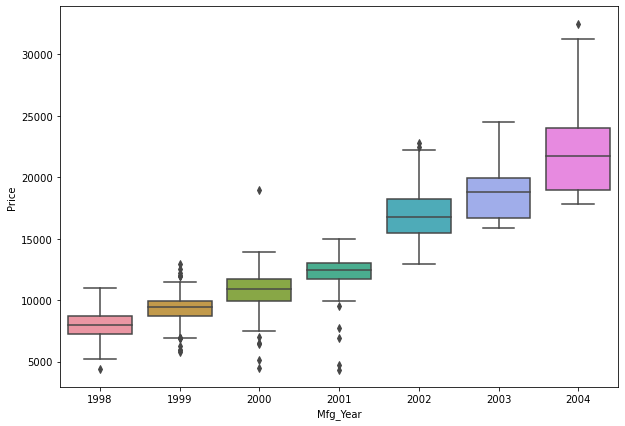

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize =(10, 7))
sns.boxplot(x='Mfg_Year',y='Price',data=clean_df)

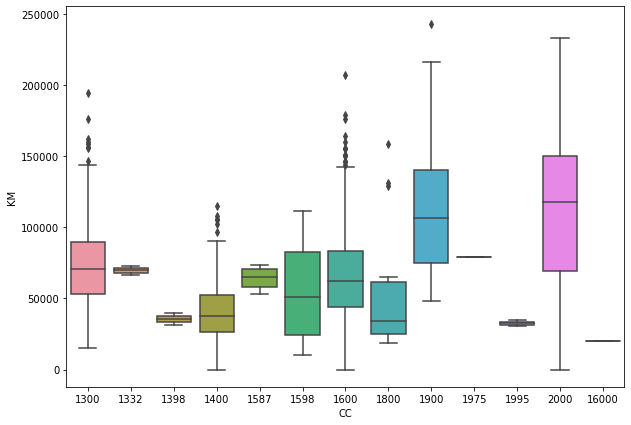

In [55]:
fig = plt.figure(figsize =(10, 7))
sns.boxplot(x='CC',y='KM',data=clean_df)

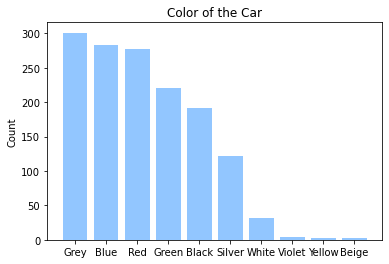

In [56]:
plt.style.use("seaborn-pastel")
plt.bar(result.index, result.values)
plt.title("Color of the Car")
plt.ylabel("Count")
plt.show()

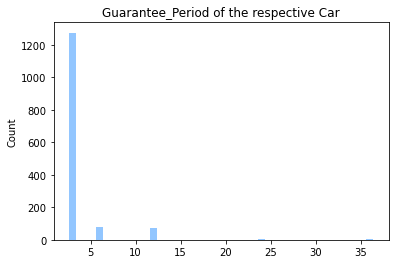

In [57]:
plt.style.use("seaborn-pastel")
plt.bar(result4.index, result4.values)
plt.title("Guarantee_Period of the respective Car")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Total KM driven by the Consumer')

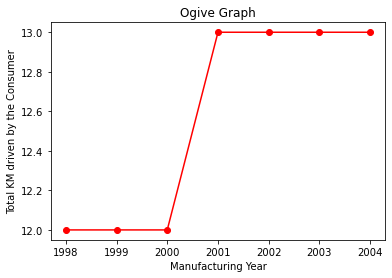

In [58]:
# to create Ogive plot
from array import array
# declaring data
array=clean_df.values
data=array[:,4]

# creating Age interval
YearInterval=[0,1998,1999,2000,2001,2002,2003,2004]
# calculating frequency and Age interval
values,base=np.histogram(data,bins=YearInterval)

# calculating cumulative sum
cumsum=np.cumsum(values)

# plotting the ogive curve
plt.plot(base[1:],cumsum,color='red',marker='o',linestyle='-')

# formatting
plt.title('Ogive Graph')
plt.xlabel('Manufacturing Year')
plt.ylabel('Total KM driven by the Consumer')

<function matplotlib.pyplot.show(*args, **kw)>

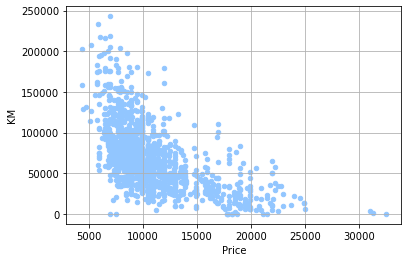

In [59]:
clean_df.plot.scatter(x='Price',y='KM')# checking if there any relationship between the price of the car and distance travelled by the Car
plt.grid('True')
plt.show

In [60]:
dummy_df.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Fuel_Type_CNG,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,1,0,0,0,0,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,1,0,0,0,0,0,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,1,0,0,0,0,0,0,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,0,0,0,0,0,0,0


In [61]:
dummy_df['Weight'].max()

1615

In [62]:
dummy_df['Weight'].min()

1000

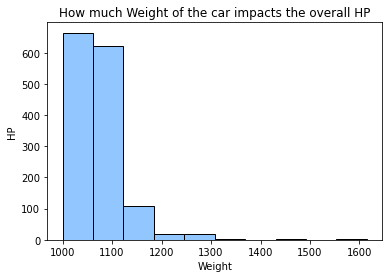

In [63]:
plt.hist(dummy_df['Weight'],edgecolor = 'black')
plt.title("How much Weight of the car impacts the overall HP")
plt.xlabel("Weight")
plt.ylabel("HP")
plt.show()

In [64]:
used_car_df=dummy_df

# Scale the data as some of the features are of different range

In [65]:
# Pandas uses sample standard deviation

used_car_df_norm = (used_car_df - used_car_df.mean())/used_car_df.std()

used_car_df_norm.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Fuel_Type_CNG,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,0.763497,-1.771349,1.327114,1.541259,-0.574495,-0.767774,0.693977,-0.242808,0.997072,-1.084761,...,-0.109416,-0.391544,2.017763,-0.4252,-0.514795,-0.489798,-0.304601,-0.052833,-0.148488,-0.045739
1,0.832425,-1.771349,1.327114,1.541259,0.117413,-0.767774,0.693977,-0.242808,0.997072,-1.084761,...,-0.109416,-0.391544,-0.495253,-0.4252,-0.514795,-0.489798,3.280700,-0.052833,-0.148488,-0.045739
2,0.887567,-1.717586,1.028970,1.541259,-0.715137,-0.767774,0.693977,-0.242808,0.997072,-1.084761,...,-0.109416,-0.391544,2.017763,-0.4252,-0.514795,-0.489798,-0.304601,-0.052833,-0.148488,-0.045739
3,1.163280,-1.610059,0.432682,1.541259,-0.547459,-0.767774,-1.439966,-0.242808,0.997072,-1.084761,...,-0.109416,2.552212,-0.495253,-0.4252,-0.514795,-0.489798,-0.304601,-0.052833,-0.148488,-0.045739
4,0.832425,-1.395005,-0.759893,1.541259,-0.800749,-0.767774,-1.439966,-0.242808,0.997072,-1.084761,...,-0.109416,2.552212,-0.495253,-0.4252,-0.514795,-0.489798,-0.304601,-0.052833,-0.148488,-0.045739


In [66]:
used_car_df.describe().transpose()
used_car_df.shape

(1436, 44)

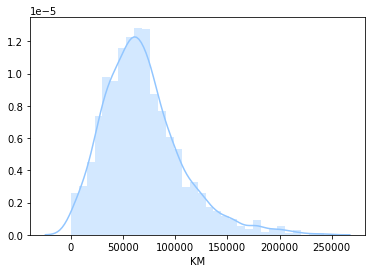

In [67]:
sns.distplot(used_car_df['KM'])

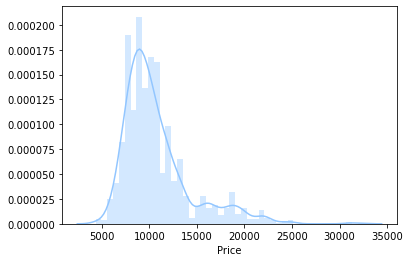

In [68]:
sns.distplot(used_car_df['Price'])

# let us check the colinearity of different features

In [69]:
# importing seaborn for statistical plots
#import seaborn as sns
#used_car_df_attr=car_df.iloc[:,1:15]

#sns.pairplot(used_car_df_attr,diag_kind='kde')  # kde is kernel density estimates
#sns.pairplot(used_car_df,diag_kind='kde')

In [70]:
#corr=used_car_df.corr()
#corr

In [71]:
# segregation of data into dependent and independent variables
# copy of all the predictor variables into x dataframe.since 'price' is a dependent variable then drop it
x=used_car_df.drop('Price',axis=1)


# copy of 'price' column alone into the y dataframe.it is dependent variable
y=used_car_df[['Price']]

In [72]:
# let us break the x and y dataframes into training set and test set.for this we
# will use sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

In [73]:
# split x and y into training and test set in 70:30 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [74]:
# invoke the linear regression function and find the best fit model on training data
from sklearn.linear_model import LinearRegression
regression_model=LinearRegression()  # class becomes object
regression_model.fit(x_train,y_train)

LinearRegression()

In [75]:
# let us explore the coefficients for each of the independent attributes
for idx,col_name in enumerate(x_train.columns):
    print("the coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

the coefficient for Age_08_04 is -117.66095503398692
the coefficient for Mfg_Month is -90.95161614446666
the coefficient for Mfg_Year is 17.384380931494867
the coefficient for KM is -0.016435826792450526
the coefficient for HP is 53.81135130716116
the coefficient for Met_Color is -45.091480894020066
the coefficient for Automatic is 561.795617593295
the coefficient for CC is -3.6471894423125453
the coefficient for Doors is 112.99609408801433
the coefficient for Gears is -36.52441418075294
the coefficient for Quarterly_Tax is 14.873289139032584
the coefficient for Weight is 8.116806728154554
the coefficient for Mfr_Guarantee is 202.4982350650559
the coefficient for BOVAG_Guarantee is 421.9477748880064
the coefficient for Guarantee_Period is 73.65842276626901
the coefficient for ABS is -164.0665868381994
the coefficient for Airbag_1 is 83.00302430999783
the coefficient for Airbag_2 is -154.83281587986005
the coefficient for Airco is 248.28599698250196
the coefficient for Automatic_airco i

In [76]:
# let us check the intercept for the model
intercept=regression_model.intercept_[0]
intercept

-25400.81746279158

In [77]:
regression_model.score(x_test,y_test)  # initial R^2 value check

0.40949081641740404

In [93]:
y_pred=regression_model.predict(x_test)
print(y_pred[0:10])

[[11581.52224394]
 [10291.70347546]
 [13192.39022859]
 [ 6114.41096764]
 [13104.83104663]
 [17253.83175094]
 [ 7676.64993255]
 [ 8836.8304951 ]
 [ 7281.62864067]
 [12074.00880646]]


# checking initial RMSE and MSE for the entire data

In [94]:
from math import sqrt
from sklearn.metrics import mean_squared_error 
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('MSE:', mse)
print('RMSE:', rmse)

MSE: 7480677.540340143
RMSE: 2735.0827300723727


In [79]:
used_car_df.shape

(1436, 44)

In [80]:
# to get the list of column names
names=[i for i in list(used_car_df)]
names

['Price',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'HP',
 'Met_Color',
 'Automatic',
 'CC',
 'Doors',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Tow_Bar',
 'Fuel_Type_1',
 'Fuel_Type_CNG',
 'Color_Black',
 'Color_Blue',
 'Color_Green',
 'Color_Grey',
 'Color_Red',
 'Color_Silver',
 'Color_Violet',
 'Color_White',
 'Color_Yellow']

In [81]:
# printing column names and coefficents together for better interpretability
pd.DataFrame(zip(names,regression_model.coef_[0].tolist()),columns=['names','coefficient'])

,names,coefficient
0,Price,-117.660955
1,Age_08_04,-90.951616
2,Mfg_Month,17.384381
3,Mfg_Year,-0.016436
4,KM,53.811351
5,HP,-45.091481
6,Met_Color,561.795618
7,Automatic,-3.647189
8,CC,112.996094
9,Doors,-36.524414


In [82]:
intercept

-25400.81746279158

In [83]:
#slope,y_intercept = best_fit_line(x_train,y_train)

In [84]:
# regression_line = [(slope*x) + intercept for x in x_train]

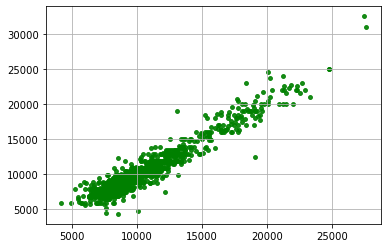

In [85]:
# plot predicted x_test and y_test values
# import seaborn as sns
# style.use('sns')
plt.scatter(regression_model.predict(x_train),y_train,label='data points',alpha=0.9,color='green',s=15)
plt.plot()
plt.grid()
plt.show()

# linear regression using statsmodels
# training for all the features

In [86]:
import statsmodels.api as sm
x_with_constant=sm.add_constant(x_train)
model=sm.OLS(y_train,x_with_constant)

In [87]:
lm=model.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     236.1
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:59:19   Log-Likelihood:                -8451.7
No. Observations:                1005   AIC:                         1.699e+04
Df Residuals:                     962   BIC:                         1.720e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0064      0.001  

# testing for all the features

In [88]:
import statsmodels.api as sm
x_with_constant=sm.add_constant(x_test)
model=sm.OLS(y_test,x_with_constant)

In [89]:
lm=model.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     126.9
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          3.48e-200
Time:                        13:59:20   Log-Likelihood:                -3556.2
No. Observations:                 431   AIC:                             7198.
Df Residuals:                     388   BIC:                             7373.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0114      0.001  

In [ ]:
print(used_car_df.columns)   # these are significant features
print(used_car_df.shape)

# Drop statistically insignificant variables which has large p-values

In [99]:
used_car_df.drop(['Met_Color','Gears','ABS'],axis=1,inplace=True)      # drop insignificant features i.e. p<alpha  (alpha=0.05)
print(used_car_df.shape)

(1436, 41)


In [100]:
used_car_df.drop(['Airbag_1','Airbag_2','Central_Lock','Power_Steering','Radio','Mistlamps'],axis=1,inplace=True)
print(used_car_df.shape)

(1436, 35)


In [101]:
used_car_df.drop(['Backseat_Divider','Radio_cassette','Tow_Bar','Color_Black','Color_Blue','Color_Green'],axis=1,inplace=True)
print(used_car_df.shape)

(1436, 29)


In [102]:
used_car_df.drop(['Color_Grey','Color_Red','Color_Silver','Color_Violet','Color_White','Color_Yellow'],axis=1,inplace=True)
print(used_car_df.shape)

(1436, 23)


In [103]:
used_car_df.columns

Index(['Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Automatic',
       'CC', 'Doors', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco',
       'Boardcomputer', 'CD_Player', 'Powered_Windows', 'Sport_Model',
       'Metallic_Rim', 'Fuel_Type_1', 'Fuel_Type_CNG'],
      dtype='object')

In [104]:
used_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1436 non-null   int64
 1   Age_08_04         1436 non-null   int64
 2   Mfg_Month         1436 non-null   int64
 3   Mfg_Year          1436 non-null   int64
 4   KM                1436 non-null   int64
 5   HP                1436 non-null   int64
 6   Automatic         1436 non-null   int64
 7   CC                1436 non-null   int64
 8   Doors             1436 non-null   int64
 9   Quarterly_Tax     1436 non-null   int64
 10  Weight            1436 non-null   int64
 11  Mfr_Guarantee     1436 non-null   int64
 12  BOVAG_Guarantee   1436 non-null   int64
 13  Guarantee_Period  1436 non-null   int64
 14  Airco             1436 non-null   int64
 15  Automatic_airco   1436 non-null   int64
 16  Boardcomputer     1436 non-null   int64
 17  CD_Player         1436 non-null  

# check the Normal Distribution Curve

In [ ]:
# importing seaborn for statistical plots             # 
#import seaborn as sns
#used_car_df_attr=used_car_df.iloc[:,1:10]

#sns.pairplot(car_df_attr,diag_kind='kde')  # kde is kernel density estimates
#sns.pairplot(used_car_df,diag_kind='kde')

In [105]:
# segregation of data into dependent and independent variables
# copy of all the predictor variables into x dataframe.since 'price' is a dependent variable then drop it
x=used_car_df.drop('Price',axis=1)


# copy of 'price' column alone into the y dataframe.it is dependent variable
y=used_car_df[['Price']]

In [106]:
# let us break the x and y dataframes into training set and test set.for this we
# will use sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

In [107]:
# split x and y into training and test set in 70:30 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [108]:
# invoke the linear regression function and find the best fit model on training data
from sklearn.linear_model import LinearRegression
regression_model=LinearRegression()  # class becomes object
regression_model.fit(x_train,y_train)

LinearRegression()

In [109]:
# let us explore the coefficients for each of the independent attributes
for idx,col_name in enumerate(x_train.columns):
    print("the coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))    # coefficients are stored in the array and coef_[0] is 
                                                                                             # accesing all the elements of the array

the coefficient for Age_08_04 is -115.62817996965332
the coefficient for Mfg_Month is -87.83841923811184
the coefficient for Mfg_Year is 16.95554993397396
the coefficient for KM is -0.01641260716310576
the coefficient for HP is 53.07807662096851
the coefficient for Automatic is 499.4715427845762
the coefficient for CC is -3.816600907514056
the coefficient for Doors is 87.315582838553
the coefficient for Quarterly_Tax is 14.167105718597462
the coefficient for Weight is 9.169695205283336
the coefficient for Mfr_Guarantee is 177.88058898202047
the coefficient for BOVAG_Guarantee is 396.63423773443833
the coefficient for Guarantee_Period is 85.5239008152449
the coefficient for Airco is 190.54835167290162
the coefficient for Automatic_airco is 2417.164139323831
the coefficient for Boardcomputer is -421.96939200487486
the coefficient for CD_Player is 196.4982237055117
the coefficient for Powered_Windows is 391.6375401338895
the coefficient for Sport_Model is 300.8606411989465
the coefficient

In [110]:
# let us check the intercept for the model
intercept=regression_model.intercept_[0]             # accessing the first element in the array
intercept

-25863.834885508135

In [111]:
regression_model.score(x_test,y_test)  # initial R^2 value check

0.3593487555739514

In [112]:
y_pred=regression_model.predict(x_test)
print(y_pred[0:10])

[[11528.7191962 ]
 [10381.92630293]
 [13240.62954511]
 [ 6268.14225572]
 [13080.23288048]
 [17081.53397107]
 [ 7334.38309395]
 [ 9127.97065694]
 [ 7399.4836826 ]
 [12248.88371429]]


# Again check RMSE and MSE after Dropping Some insignificant variables

In [113]:
from math import sqrt
from sklearn.metrics import mean_squared_error 
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('MSE:', mse)
print('RMSE:', rmse)

MSE: 8115886.270037266
RMSE: 2848.8394602078347


# apply Ridge Regression

In [118]:
from sklearn.linear_model import Ridge

ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [119]:
ridge_reg.score(x_test,y_test)

0.7376267804483096

# apply Lasso Regression

In [122]:
from sklearn import linear_model

lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [123]:
lasso_reg.score(x_test,y_test)

0.7277148624962906

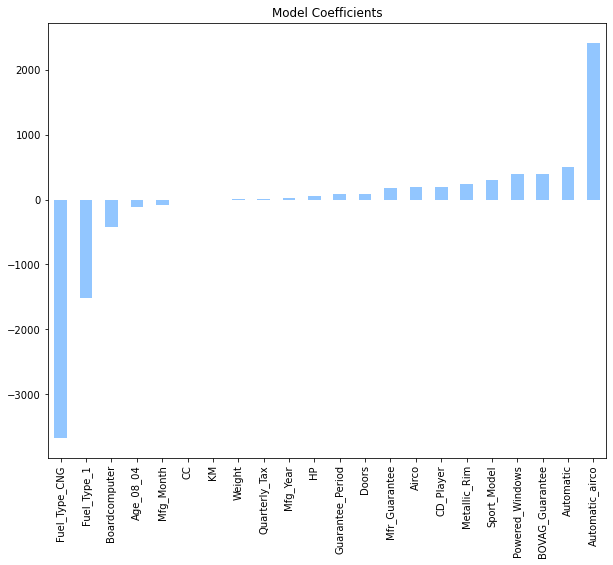

In [124]:
# checking the magnitude of coefficients
from pandas import Series,DataFrame
predictors=x_train.columns

coef=Series(regression_model.coef_.flatten(),predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar',title='Model Coefficients')
plt.show()

# CONCLUSION
 variables showing +ve effect on regression model are Automatic_airco,Automatic,BOVAG_Guarantee,Powered_Windows,Sport_Model,Metallic_Rim,
 CD_Player,Airco,Mfg_Guarantee,Doors,Guarantee_Period,HP

 Higher the value of beta coefficient higher is the impact

 car features like the above mentioned plays an important role in the sales of used car

 variables showing -ve effect on regression model for predicting used car prices are:
 Fuel_Type_CNG,Fuel_Type_1,Boardcomputer,Age_08_04,Mfg_Month

 car price has a -ve effect on Fuel_Type,Mfg_month etc keeping all other variables constant

 some variables which are hardly affecting on model prediction for car price determination are CC,KM,Weight,Quaterly_Tax,Mfg_Year etc




In [126]:
# Now again run OLS method to check differenet parameters
x_with_constant=sm.add_constant(x_train)
model1=sm.OLS(y_train,x_with_constant)

In [127]:
lm1=model1.fit()
lm1.params

const                 -0.006525
Age_08_04           -116.703286
Mfg_Month            -88.913525
Mfg_Year               4.054276
KM                    -0.016413
HP                    53.078077
Automatic            499.471543
CC                    -3.816601
Doors                 87.315583
Quarterly_Tax         14.167106
Weight                 9.169695
Mfr_Guarantee        177.880589
BOVAG_Guarantee      396.634238
Guarantee_Period      85.523901
Airco                190.548352
Automatic_airco     2417.164139
Boardcomputer       -421.969392
CD_Player            196.498224
Powered_Windows      391.637540
Sport_Model          300.860641
Metallic_Rim         238.961389
Fuel_Type_1        -1515.313772
Fuel_Type_CNG      -3671.157769
dtype: float64

In [128]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     466.1
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:13:21   Log-Likelihood:                -8467.5
No. Observations:                1005   AIC:                         1.698e+04
Df Residuals:                     983   BIC:                         1.709e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0065      0.001  

# Further checking variation Inflation Factor

In [129]:
# import statistical model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import statsmodels.tsa.api as smt
import statsmodels.api as sm
warnings.filterwarnings('ignore')
%matplotlib inline

In [130]:
x_test=sm.add_constant(x_test)

In [131]:
y_pred=lm1.predict(x_test)

In [132]:
residual=y_test-y_pred

In [133]:
# check multicolinearity and VIF
vif=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
pd.DataFrame({'vif':vif[0:]},index=x_train.columns)

,vif
Age_08_04,41.027388
Mfg_Month,4.030133
Mfg_Year,1872.739901
KM,2.063813
HP,5.840968
Automatic,1.083886
CC,8.485855
Doors,1.303190
Quarterly_Tax,4.035207
Weight,3.522015


In [134]:
used_car_df.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Automatic,CC,Doors,Quarterly_Tax,...,Guarantee_Period,Airco,Automatic_airco,Boardcomputer,CD_Player,Powered_Windows,Sport_Model,Metallic_Rim,Fuel_Type_1,Fuel_Type_CNG
0,13500,23,10,2002,46986,90,0,2000,3,210,...,3,0,0,1,0,1,0,0,0,0
1,13750,23,10,2002,72937,90,0,2000,3,210,...,3,1,0,1,1,0,0,0,0,0
2,13950,24,9,2002,41711,90,0,2000,3,210,...,3,0,0,1,0,0,0,0,0,0
3,14950,26,7,2002,48000,90,0,2000,3,210,...,3,0,0,1,0,0,0,0,0,0
4,13750,30,3,2002,38500,90,0,2000,3,210,...,3,1,0,1,0,1,0,0,0,0


In [135]:
# the variables which has VIF>10 will have collinear effect


# normality of Residual

In [ ]:
#sns.distplot(residual)     

In [ ]:
#fig,ax=plt.subplots(figsize=(6,2.5))
#_, (__, __, r)=sp.stats.probplot(residual,plot=ax,fit=True)

In [ ]:
#fig,ax = plt.subplots(figsize=(6,2.5))
#_ = ax.scatter(y_pred,residual)

# References
http://ripublication.com/irph/ijict_spl/ijictv4n7spl_17.pdf